In [254]:
import numpy as np
import matplotlib.pyplot as plt

def gramsche_determinante(*args):
    set_mit_grad_der_Dimensionen = set()
    matrix = []
    for arg in args:
        set_mit_grad_der_Dimensionen.add(len(arg))
        
    if len(set_mit_grad_der_Dimensionen) == 1: #hier habe die mathematische eigenschaft von einer Menge genutz, das wiederholungen keine Rolle spielen
        vektor = args
        for i in vektor:
            for j in vektor:
                matrix.append(np.dot(i,j))
                
    else:
        return False
        
    reshaped_matrix = np.array(matrix).reshape(len(args), len(args))
    
    det = np.linalg.det(reshaped_matrix)
                
    return det
    

In [255]:
gramsche_determinante([1,0,1,1], [0,0,-1,1], [0,0,0,1])

1.0000000000000004

In [443]:
def normieren(vektor):
    return np.array(vektor)/np.sqrt(np.dot(vektor, vektor))
    
class gram_schmidt:
    def __init__(self, vektor1, vektor2, vektor3):
        self.u1 = np.array(vektor1)
        self.u2 = np.array(vektor2)
        self.u3 = np.array(vektor3)
        
        
    def orthonomieren(self):
        if gramsche_determinante(self.u1, self.u2, self.u3) > 0:
            self.w1 = self.u1
            self.w2 = self.u2 - np.dot(self.u2, self.w1)/np.dot(self.w1, self.w1)*self.w1
            self.w3 = self.u3 - np.dot(self.u3, self.w1)/np.dot(self.w1, self.w1)*self.w1 - np.dot(self.u3, self.w2)/np.dot(self.w2, self.w2)*self.w2
            liste_mit_orthonomierten_vektoren = [normieren(self.w1), normieren(self.w2), normieren(self.w3)]
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            
            ax.scatter(self.w1, self.w2, self.w3)
            ax.scatter(liste_mit_orthonomierten_vektoren[0], liste_mit_orthonomierten_vektoren[1], liste_mit_orthonomierten_vektoren[2])
            
        else:
            print('Die Gewählten Vektoren sind nicht linear Unabhänngig')
        
        return liste_mit_orthonomierten_vektoren
    
    def mehr_als_drei_vekotoren(self, **kwargs):
        vektors = []
        for key, ele in kwargs.items():
            self.key = np.array(ele)
            vektors.append(self.key)
        
        results = 0
        for i in range(1, len(vektors)):
            for j in vektors[0:i]:
                results += np.dot(vektors[i], j)/np.dot(j, j)*j
                results = vektors[i] - results
                vektors[i] = results
                results = 0
        
        return vektors
            
        
    
        
            
# muss nochmal komplett überarbeitet werden, formel klar definieren
#problem bei der Überlegung er macht die schritte einmal zu viel

In [444]:
myclass = gram_schmidt([1,0,1,1], [0,0,-1,1], [0,0,0,1])

[array([0.57735027, 0.        , 0.57735027, 0.57735027]),
 array([ 0.        ,  0.        , -0.70710678,  0.70710678]),
 array([-0.81649658,  0.        ,  0.40824829,  0.40824829])]

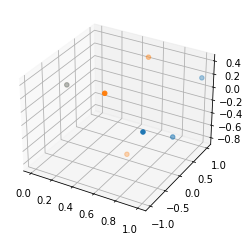

In [445]:
myclass.orthonomieren()

In [446]:
vektoren = {'w':[1,0,1,1], 'w1':[0,0,-1,1], 'w2':[0,0,0,1]}

In [447]:
a = myclass.mehr_als_drei_vekotoren(**vektoren)

for i in a:
    print(normieren(i))

[0.57735027 0.         0.57735027 0.57735027]
[ 0.          0.         -0.70710678  0.70710678]
[-0.81649658  0.          0.40824829  0.40824829]
